<br><br><center><h1 style="font-size:2em;color:#2467C0">Project: Segmenting and Clustering Neighborhoods in Zürich, CH</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://media-cdn.tripadvisor.com/media/photo-s/01/2d/b1/8f/zurich.jpg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This presentaion is part of the capstone project of the IBM Data Science Professional Certificate offer through Coursera. This submission contains all the tasks to be solved by  means of Foursquare location data and Machine Learning Algorithms. All the required tasks to accomplish the project goals are part of this final report. 
<br>
<br>
<br>
The data for this project will be gathered from the web through a web scraping process using BeautifulSoup. Additional location data will be gathered from Foursquare using their API.
<br>
<br>
<h1 style="font-size:1em;color:#2467C0">This Presentation was created by: Gustavo Cedeño</h1>

</tr>
</table>

# Introduction

>This presentaion is part of the capstone project of the IBM Data Science Professional Certificate offer through Coursera. This submission contains all the tasks to be solved by  means of Foursquare location data and Machine Learning Algorithms. All the required tasks to accomplish the project goals are part of this final report.

# Zürich, Switzerland
> Zürich or Zurich (/ˈzjʊərɪk/ ZEWR-ik) is the largest city in Switzerland and the capital of the canton of Zürich. It is located in north-central Switzerland at the northwestern tip of Lake Zürich. The municipality has approximately 409,000 inhabitants. Zürich is a hub for railways, roads, and air traffic. Both Zurich Airport and railway station are the largest and busiest in the country.

>Zürich is a leading global city and among the world's largest financial centres despite having a relatively small population. The city is home to a large number of financial institutions and banking companies. Most of Switzerland's research and development centres are concentrated in Zürich and the low tax rates attract overseas companies to set up their headquarters there. Info taken from: [Zürich](https://en.wikipedia.org/wiki/Z%C3%BCrich)  

## Problem Definition

> The main goal of this project is to provide business intelligence for an international company that is willing to open a new restaurant supply shop in Zürich. The target market for this kind of business is limited to those within the culinary community. This includes: restaurants, culinary schools, cafeterias(including medical and schools), bars, caterers, bakeries and coffee shops. Therefore, it is of major importance clustering places around the city and find out which ones of those concentrate venues which belong to the target market. This information will help decision makers choosing the right place for opening shops, planning logistics, calculating costs and designing better marketing campaigns. 

<a id='projectdetails'></a>
## Project Details
>Main tasks in this project are as follows:
>1. Gathering data
>2. Assessing and cleaning data
>3. Creating Visualizations
>4. Using the Foursquare API to gather venues information.
>5. Clustering.
>6. Results analysis and giving recommedations.

## Data Source
> The whole data for this project is gathered from the web and from Foursquare location data service using their API. The idea is to create a dataset containing the different neighborhoods in the city of Zürich according to their respective postal codes, then add the geographical coordinates and venues information and location in each neighborhood. The final resulting dataset is used for creating clusters with different venues and find out which clusters constitute important segments to direct marketing campaigns. 

>1. **Zurich - postal codes**
>All the information regarding postal codes for the different neighborhoods in the city of Zürich will be gathered from the website [geonames_postalcodes_CH](https://www.geonames.org/postal-codes/CH/ZH/zurich.html) performing web scraping with the help of BeatifulSoup and then converting the data into a pandas DataFrame for further analysis.

>2. **Additional Data via the Foursquare API**
> All the data related to venues will be gathered from Foursquare location data using their API. [Foursquare](https://foursquare.com/)

<a id='wrangling'></a>
# Data Wrangling
>>Data wrangling, which consists of the following tasks:
>1. Gathering data
>2. Assessing data
>3. Cleaning data
>4. Storing, analyzing, and visualizing the wrangled data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns 
# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml
# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import pickle

print('Libraries imported.')

Libraries imported.


<a id='gathering'></a>
## Gathering Data
> ### Scraping the web to obtain the postal codes data for the Neighborhoods in Zürich
>All the information regarding postal codes for the different neighborhoods in the city of Zürich will be gathered from the website [geonames_postalcodes_CH](https://www.geonames.org/postal-codes/CH/ZH/zurich.html) performing web scraping with the help of BeatifulSoup and then converting the data into a pandas DataFrame for further analysis.

In [2]:
#Zurich
#Web_pages containing the required data
link1='https://www.geonames.org/postal-codes/CH/ZH/zurich.html'
link2='http://www.all-about-switzerland.info/systematics-swiss-postal-zip-codes.html'
url = requests.get(link1).text
soup = BeautifulSoup(url,'html.parser')

<a id='transform'></a>
## Transforming Data
>Data gathered fom the web come in the form of **JSON** data, so additional efforts are required to convert the needed data into a pandas DataFrame to perform further analysis.
>### Transforming the data into a pandas dataframe 
The dataframe will consist of six columns: `Postalcode`,`Kanton`,`Borough`,`Place`,`Latitute` and `Longitude`

In [4]:
#Finding the right table and getting the data from the HTML script
My_table = soup.find('table',{'class':'restable'})
fields = My_table.find_all('td')
#Getting the data into a python list
data_fields=[]
for field in fields:
    data_fields.append(field.text.strip())
#Extracting the required data 
place=[]
postcode = []
Kanton = []
Bezirk = []
GeoCoords= []
for i in range(0, len(data_fields), 9):#every field has 9 elements
    if i <=1791: #last row with complete data
        place.append(data_fields[i+1])
        postcode.append(data_fields[i+2])
        Kanton.append(data_fields[i+4])
        Bezirk.append(data_fields[i+5])
        GeoCoords.append(data_fields[i+8])
#Creating the DataFrame using the data gethered from the web
df_Zurich = pd.DataFrame(data=[postcode,Kanton,Bezirk,place,GeoCoords]).transpose()
df_Zurich.columns = ['Postalcode', 'Kanton', 'Borough','Place','Location']
#Checking the resulted df
print(df_Zurich.shape)
df_Zurich.head()

(200, 5)


,Postalcode,Kanton,Borough,Place,Location
0,8001,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55
1,8002,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55
2,8003,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55
3,8004,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55
4,8005,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55


It is necessary to split the coordinates into Latitute and Longitude. 

In [6]:
df_Zurich['Latitude'] = df_Zurich['Location'].apply(lambda x:float(x.split("/")[0]))
df_Zurich['Longitude'] = df_Zurich['Location'].apply(lambda x:float(x.split("/")[1]))
#Location column is not needed anymore 
df_Zurich.drop('Location',axis=1,inplace=True)

In [7]:
#Checking the final resulting DataFrame
df_Zurich.head()

,Postalcode,Kanton,Borough,Place,Latitude,Longitude
0,8001,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
1,8002,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
2,8003,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
3,8004,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
4,8005,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55


In [8]:
# @hidden_cell
#Saving the dfgroup for later use
file_Name = "df_Zurich.pkl"

# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df to the
# file named "dfgroup.pkl"
pickle.dump(df_Zurich,fileObject)   

# closing the fileObject
fileObject.close()

In [9]:
# @hidden_cell
#Opening the pickled df 
zurich_data = pd.read_pickle("df_Zurich.pkl")
zurich_data.head() #continue using the pickled df 

,Postalcode,Kanton,Borough,Place,Latitude,Longitude
0,8001,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
1,8002,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
2,8003,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
3,8004,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
4,8005,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55


<a id='method'></a>
# Methodology

>In this project, I will apply unsupervised learning techniques to identify clusters of venues in the city of Zürich, Switzerland and then create city segments based on the venues belonging to each cluster. These segments can then be used by the investors to make better business decisions like for instance directing marketing campaigns towards audiences that will have the highest expected rate of returns.
Since the main task consist in clustering, I will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

## Data Analysis and Clustering

>Before aplying machine learning algorithms it is necessary to gather the venues data using the Foursquare API, perform some exploratory data analysis and preprocess the data and get it ready for KMeans clustering. 

<a id='visuals'></a>
## Creating some Visualizations
>### Creating a map of Zurich with neighborhoods superimposed on top.

In [10]:
address = 'Zurich, Switzerland'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Zurich, Switzerland are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Zurich, Switzerland are 47.3723941, 8.5423328.


In [11]:
# create map of Zurich using latitude and longitude values
map_Zurich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(zurich_data['Latitude'], zurich_data['Longitude'], zurich_data['Borough'], zurich_data['Place']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Zurich)  
    
map_Zurich

<a id='FsQAPI'></a>
## Foursquare API

###  Using the Foursquare API to explore the neighborhoods and segment them.

#### Defining Foursquare Credentials and Version.

In [1]:
# @hidden_cell


#### Exploring the first neighborhood in the dataframe.

In [14]:
neighborhood_latitude = zurich_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = zurich_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = zurich_data.loc[0, 'Place'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Zürich are 47.367, 8.55.


#### Now, let's get the top 100 venues that are in  Rouge, Malvern within a radius of 1000 meters.

First, let's create the GET request URL. Name your URL **url**.

In [53]:
#Sending the GET request and examining the results
results = requests.get(url).json()
#results

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,John Baker Ltd,Bakery,47.367208,8.547293
1,ViCAFE - Barista Espresso Bar,Coffee Shop,47.366784,8.546093
2,Mövenpick Ice Cream Boutique,Ice Cream Shop,47.366129,8.546777
3,Tibits,Vegetarian / Vegan Restaurant,47.365086,8.547895
4,Arthouse Le Paris,Indie Movie Theater,47.366359,8.547593


In [19]:
#Number of venues returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Using a function to repeat the same process to all the neighborhoods in Zurich

In [57]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Creating a new dataframe called *zurich_venues*.

In [59]:
#zurich_venues = getNearbyVenues(names=zurich_data['Place'],
#                                   latitudes=zurich_data['Latitude'],
 #                                  longitudes=zurich_data['Longitude']);


#### Let's check the size of the resulting dataframe

In [54]:
#print(zurich_venues.shape)
#zurich_venues.head()

In [60]:
#Let's check how many venues were returned for each neighborhood
#zurich_venues.groupby('Neighborhood').count()

#### Let's find out how many unique categories can be curated from all the returned venues

In [24]:
print('There are {} uniques categories.'.format(len(zurich_venues['Venue Category'].unique())))

There are 179 uniques categories.


<a id='exploring'></a>
## Exploring Neighborhoods

In [25]:
# one hot encoding
zurich_onehot = pd.get_dummies(zurich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
zurich_onehot['Neighborhood'] = zurich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [zurich_onehot.columns[-1]] + list(zurich_onehot.columns[:-1])
toronto_onehot = zurich_onehot[fixed_columns]

zurich_onehot.head()

,Advertising Agency,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Beer Garden,Bistro,Board Shop,Boat or Ferry,Bookstore,Bratwurst Joint,Brewery,Bridal Shop,Bridge,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cable Car,Café,Cheese Shop,Chinese Restaurant,Christmas Market,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Drugstore,Eastern European Restaurant,Electronics Store,Event Service,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Frame Store,French Restaurant,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Mountain,Movie Theater,Music Venue,Nightclub,Notary,Office,Opera House,Outdoor Sculpture,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Racetrack,Real Estate Office,Recreation Center,Recycling Facility,Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Speakeasy,Sporting Goods Shop,Stables,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tailor Shop,Tapas Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Zürich
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Zürich
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Zürich
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Zürich
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [26]:
zurich_onehot.shape

(2939, 180)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
zurich_grouped = zurich_onehot.groupby('Neighborhood').mean().reset_index()
zurich_grouped.head()

,Neighborhood,Advertising Agency,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Beer Garden,Bistro,Board Shop,Boat or Ferry,Bookstore,Bratwurst Joint,Brewery,Bridal Shop,Bridge,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cable Car,Café,Cheese Shop,Chinese Restaurant,Christmas Market,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Drugstore,Eastern European Restaurant,Electronics Store,Event Service,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Frame Store,French Restaurant,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Mountain,Movie Theater,Music Venue,Nightclub,Notary,Office,Opera House,Outdoor Sculpture,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Racetrack,Real Estate Office,Recreation Center,Recycling Facility,Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Speakeasy,Sporting Goods Shop,Stables,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tailor Shop,Tapas Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Adetswil,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adliswil,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.000000,0.0,0.

In [28]:
# Let's confirm the new size
zurich_grouped.shape

(162, 180)

In [29]:
#Checking missig data
zurich_grouped.isnull().any().any()

False


### Let's print each neighborhood along with the top 5 most common venues

In [61]:
num_top_venues = 5

for hood in zurich_grouped['Neighborhood']:
    #print("----"+hood+"----")
    temp = zurich_grouped[zurich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = zurich_grouped['Neighborhood']

for ind in np.arange(zurich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zurich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adetswil,Italian Restaurant,Zoo Exhibit,Factory,Food Court,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
1,Adliswil,Supermarket,Light Rail Station,Snack Place,Fast Food Restaurant,Arts & Crafts Store,Bus Station,Restaurant,Falafel Restaurant,Factory,Flower Shop
2,Aeugst am Albis,Mountain,Zoo Exhibit,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
3,Affoltern am Albis,Restaurant,Grocery Store,Plaza,Italian Restaurant,Train Station,Tapas Restaurant,Electronics Store,Zoo Exhibit,Factory,Flower Shop
4,Andelfingen,Home Service,Italian Restaurant,Restaurant,Train Station,Gym,Grocery Store,Zoo Exhibit,Event Service,Flower Shop,Field


<a id='clustering'></a>
## Clustering

### Cluster Neighborhoods
>In this substep, I will apply k-means clustering to the pre-processed dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.
>To help choosing the right k for clustering, I use a function that gets the Sum Squared of Errors for each number of clusters and then plot the errors for different values o ks. The final k has to show a significant reduction in error and should not be too large in order to be used properly.

In [33]:
#Creating the final dataset for KMeans
zurich_grouped_clustering = zurich_grouped.drop('Neighborhood', 1)

In [34]:
# Creating a function that helps finding the right number of clusters
def kmeans_score(data, k):
    '''
    returns the kmeans score regarding SSE(Sum Square of Errors) for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        k - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(init="k-means++", n_clusters= k, random_state=0)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

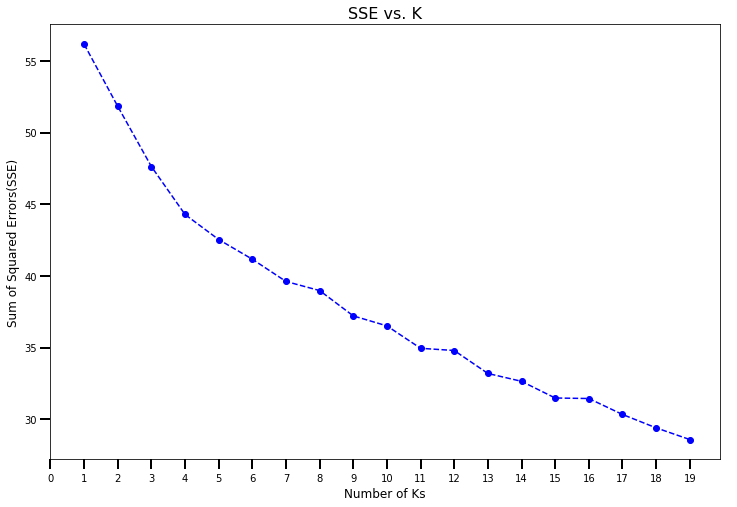

In [35]:
scores = []
#testing for cluster counts through 20 clusters
ks=20
k_values = list(range(1,ks))

for k in k_values:
    scores.append(kmeans_score(zurich_grouped_clustering , k))

plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(k_values, scores, linestyle='--', marker='o', color='b');
ax.xaxis.set_tick_params(width=2, length=10)
ax.yaxis.set_tick_params(width=2, length=10)
plt.xlabel('Number of Ks',fontsize=12)
plt.ylabel('Sum of Squared Errors(SSE)',fontsize=12)
plt.xticks(np.arange(0, ks, 1))
plt.title('SSE vs. K',fontsize=16)
plt.show()

## Selecting k
> Using the elbow method to determine the optimal number of clusters for k-means clustering, it can be noticed from the plot, that the errors (SSE) continue falling with increasing number of clusters. However, since the goal of clustering is to identify segments to be used for directing marketing campaigns towards audiences that will have the highest expeted rate of returns, creating a high number of clusters might not be so beneficial and doesn't make much sense if the marketing campaigns will only be directed to some specific clusters and the others might just be discarded, meaning that after some point each additional cluster provides even a smaller net benefit. Considering that, and based on the SSE vs. k curve besides the practical application of the created cluster, I would suggest a k = 9 to be a proper value that satisfies the two conditions of not being to large to make marketing results analysis and application too complex, and also showing a significant reduction in error (SSE). 

In [36]:
# set number of clusters
kclusters = 9
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zurich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 8, 7, 8, 8, 8, 1, 8, 2, 8])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

zurich_data.rename(index=str, columns={'Place':'Neighborhood'},inplace=True)

zurich_merged = zurich_data

# merge zurich_grouped with toronto_data to add latitude/longitude for each neighborhood
zurich_merged = zurich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

zurich_merged.head() # check the last columns!

,Postalcode,Kanton,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,8001,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,8.0,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
1,8002,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,8.0,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
2,8003,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,8.0,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
3,8004,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,8.0,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
4,8005,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,8.0,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House


In [62]:
#print(zurich_merged.shape)
#zurich_merged.dropna(inplace=True)
#zurich_merged.isnull().sum()

In [63]:
#zurich_merged['Cluster Labels'] = zurich_merged['Cluster Labels'].astype('int64')
#zurich_merged.info()

<a id='results'></a>
# Results

>Finally, let's visualize the resulting clusters

In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zurich_merged['Latitude'], zurich_merged['Longitude'], zurich_merged['Neighborhood'], zurich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    #print(cluster+1,color)
       
map_clusters

## Examine Clusters

>Now,we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then select the most interesting clusters. 

# Cluster 1

In [41]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 0, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,Kanton Zürich,8.691,0,Gym,Hotel,Swiss Restaurant,Factory,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
50,Kanton Zürich,8.669,0,Hotel,Supermarket,Swiss Restaurant,Restaurant,Food Court,Factory,Food,Flower Shop,Field,Fast Food Restaurant
60,Kanton Zürich,8.391,0,Brewery,Swiss Restaurant,Bakery,Grocery Store,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Field
61,Kanton Zürich,8.627,0,Sporting Goods Shop,Swiss Restaurant,Factory,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
68,Kanton Zürich,8.576,0,Swiss Restaurant,Pool,Bus Station,Zoo Exhibit,Factory,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
73,Kanton Zürich,8.502,0,Construction & Landscaping,Swiss Restaurant,Italian Restaurant,Bakery,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant
75,Kanton Zürich,8.554,0,Swiss Restaurant,American Restaurant,Flower Shop,Gastropub,Zoo Exhibit,Falafel Restaurant,Food & Drink Shop,Food,Field,Fast Food Restaurant
76,Kanton Zürich,8.502,0,Swiss Restaurant,Market,Convenience Store,Gastropub,Bus Stop,Zoo Exhibit,Food,Flower Shop,Field,Fast Food Restaurant
77,Kanton Zürich,8.521,0,Café,Dessert Shop,Bistro,Swiss Restaurant,Beach,Farm,Food Court,Food & Drink Shop,Food,Flower Shop
81,Kanton Zürich,8.633,0,IT Services,Snack Place,Shopping Mall,Discount Store,Italian Restaurant,Swiss Restaurant,Bus Station,Bakery,Zoo Exhibit,Farmers Market


# Cluster 2

In [42]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 1, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
138,Kanton Zürich,8.436,1,Restaurant,Swiss Restaurant,Zoo Exhibit,Event Service,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
165,Kanton Zürich,8.807,1,Restaurant,Zoo Exhibit,Factory,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
166,Kanton Zürich,8.775,1,Restaurant,Zoo Exhibit,Factory,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
171,Kanton Zürich,8.594,1,Restaurant,Shopping Mall,Business Service,Zoo Exhibit,Factory,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
176,Kanton Zürich,8.654,1,Restaurant,Zoo Exhibit,Factory,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
177,Kanton Zürich,8.689,1,Swiss Restaurant,Restaurant,Zoo Exhibit,Event Service,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
180,Kanton Zürich,8.728,1,Restaurant,Train Station,Zoo Exhibit,Event Service,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
187,Kanton Zürich,8.718,1,Restaurant,Brewery,Bus Station,Zoo Exhibit,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant
192,Kanton Zürich,8.667,1,Swiss Restaurant,Restaurant,Zoo Exhibit,Event Service,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
194,Kanton Zürich,8.431,1,Tunnel,Restaurant,Zoo Exhibit,Event Service,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm


# Cluster 3

In [43]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 2, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
71,Kanton Zürich,8.452,2,Swiss Restaurant,Zoo Exhibit,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
152,Kanton Zürich,8.439,2,Swiss Restaurant,Zoo Exhibit,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
160,Kanton Zürich,8.508,2,Swiss Restaurant,Zoo Exhibit,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market


# Cluster 4

In [44]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 3, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Kanton Zürich,8.530,3,Pizza Place,Airport Terminal,Convenience Store,Swiss Restaurant,Train Station,Zoo Exhibit,Factory,Food,Flower Shop,Field
31,Kanton Zürich,8.751,3,Convenience Store,Food & Drink Shop,Art Gallery,Train Station,Bakery,Falafel Restaurant,Food Court,Food,Flower Shop,Field
39,Kanton Zürich,8.657,3,Train Station,Café,Italian Restaurant,Zoo Exhibit,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
48,Kanton Zürich,8.697,3,Print Shop,Grocery Store,Bus Stop,Train Station,Cheese Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
72,Kanton Zürich,8.377,3,Soccer Field,Swiss Restaurant,Train Station,Café,Zoo Exhibit,Factory,Food,Flower Shop,Field,Fast Food Restaurant
78,Kanton Zürich,8.543,3,Flower Shop,Miscellaneous Shop,Restaurant,Train Station,Zoo Exhibit,Factory,Food & Drink Shop,Food,Field,Fast Food Restaurant
79,Kanton Zürich,8.644,3,River,Hardware Store,Train Station,Pier,Zoo Exhibit,Event Service,Food,Flower Shop,Field,Fast Food Restaurant
80,Kanton Zürich,8.630,3,Cosmetics Shop,Train Station,Food & Drink Shop,Food Truck,Dessert Shop,Farm,Food Court,Deli / Bodega,Food,Flower Shop
82,Kanton Zürich,8.721,3,Grocery Store,Playground,Pizza Place,Swiss Restaurant,Train Station,Café,Event Service,Flower Shop,Field,Fast Food Restaurant
88,Kanton Zürich,8.856,3,Café,Theater,Factory,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm


# Cluster 5

In [45]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 4, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
135,Kanton Zürich,8.427,4,Bus Station,Zoo Exhibit,Food Truck,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
143,Kanton Zürich,8.637,4,Bus Station,Grocery Store,Zoo Exhibit,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
158,Kanton Zürich,8.433,4,Bus Station,Zoo Exhibit,Food Truck,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
161,Kanton Zürich,8.635,4,Bus Station,Zoo Exhibit,Food Truck,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
190,Kanton Zürich,8.783,4,Bus Station,Zoo Exhibit,Food Truck,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm
197,Kanton Zürich,8.533,4,Bus Station,Grocery Store,Zoo Exhibit,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market


# Cluster 6

In [46]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 5, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Kanton Zürich,8.668,5,Italian Restaurant,Restaurant,Zoo Exhibit,Factory,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
150,Kanton Zürich,8.490,5,Italian Restaurant,Zoo Exhibit,Factory,Food Court,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
168,Kanton Zürich,8.840,5,Italian Restaurant,Zoo Exhibit,Factory,Food Court,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market


# Cluster 7

In [47]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 6, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
115,Kanton Zürich,8.856,6,Gym / Fitness Center,Hardware Store,Convenience Store,Department Store,Dessert Shop,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant
167,Kanton Zürich,8.865,6,Gym / Fitness Center,Food Truck,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


# Cluster 8

In [48]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 7, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
114,Kanton Zürich,8.75,7,Mountain,Garden Center,Zoo Exhibit,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market
196,Kanton Zürich,8.49,7,Mountain,Zoo Exhibit,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Field,Fast Food Restaurant,Farmers Market


# Cluster 9

In [49]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 8, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
1,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
2,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
3,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
4,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
5,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
6,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
7,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
8,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House
9,Kanton Zürich,8.550,8,Hotel,Italian Restaurant,Café,Swiss Restaurant,Bar,Plaza,Coffee Shop,Lounge,Supermarket,Opera House


<a id='discussion'></a>
## Discussion

>Keeping in mind that the main business application consists in opening a new restaurant supply shop and that the target market for this kind of business includes: restaurants, culinary schools, cafeterias(including medical and schools), bars, caterers, bakeries and coffee shops. Based on the clustering results, cluster 1 and mainly cluster 4 are the ones grouping a high proportion of venues which are part of the target market. This is valuable information that will help decision makers choosing the right place for opening the shop, planning logistics, calculating costs and designing better marketing campaigns.     


<a id='conclusion'></a>
## Conclusion

>Combining location data with unsupervised learning techniques, it was possible to segment places in the city of Zürich and create clusters that agglomerate venues considered the target audience for the proposed business case, namely restaurants, hotels, bars, coffe shops, bistros, hotels on others related to the culinary community.
>For this specific project, clusters 1 and 4 are the most relevant ones to further analyze and consider when making business decisions. 

<a id='reference'></a>
# References
* [Geo_Data_Switzerland](http://www.ralphstraumann.ch/blog/2011/10/zipscribble-map-switzerland-part-i/)
* [geonames_postalcodes_CH](https://www.geonames.org/postal-codes/CH/ZH/zurich.html)
* [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Web Scraping Wikipedia Tables using BeautifulSoup and Python](https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722)
* [Foursquare](https://foursquare.com/)
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
* [IBM_Coursera_Data Science Certificate](https://www.coursera.org/specializations/ibm-data-science-professional-certificate)

From the terminal or command line, use the following expression:


jupyter nbconvert Capstone_Project_Presentation.ipynb --to slides --post serve --template output-toggle


This should open a tab in your web browser where you can scroll through the presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide.